# 01 — EDA Overview
Load the processed dataset and run a quick audit: shapes, nulls, types, previews.

Real Estate Price Perception. This notebook explores the factors driving property prices using the 'Real Estate Price Insights' dataset from Kaggle.

In [4]:
import os
os.chdir(r"C:\Users\Maliukov\Downloads\real-estate-analytics\real-estate-analytics")
print("Current working dir:", os.getcwd())


Current working dir: C:\Users\Maliukov\Downloads\real-estate-analytics\real-estate-analytics


In [5]:
from pathlib import Path
import pandas as pd

p = Path('data/processed/clean.csv')
df = pd.read_csv(p) if p.exists() else pd.read_csv('data/raw/real_estate_price_insights.csv')
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [9]:
missing = df.isna().sum()

In [10]:
print(missing[missing > 0].sort_values(ascending=False))

Series([], dtype: int64)


In [11]:
dup = df.duplicated().sum()

In [12]:
print (dup)

0


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.outliers import Winsorizer
import plotly.express as px

In [13]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

сheck how the target variable (price) is distributed; check how if price depending on area; does furnishing influences the price

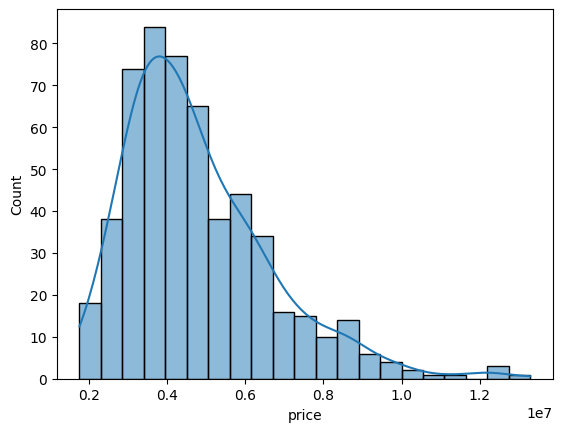

In [20]:
sns.histplot(data=df, x='price', kde=True)
plt.show()

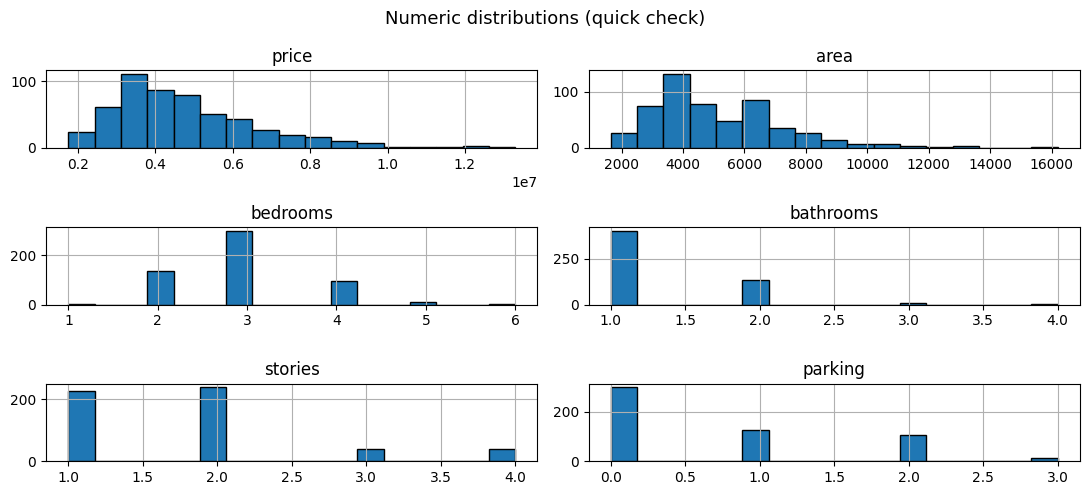

In [22]:

df.hist(bins=17, figsize=(11, 5), edgecolor="black")
plt.suptitle("Numeric distributions (quick check)", fontsize=13)
plt.tight_layout()
plt.show()

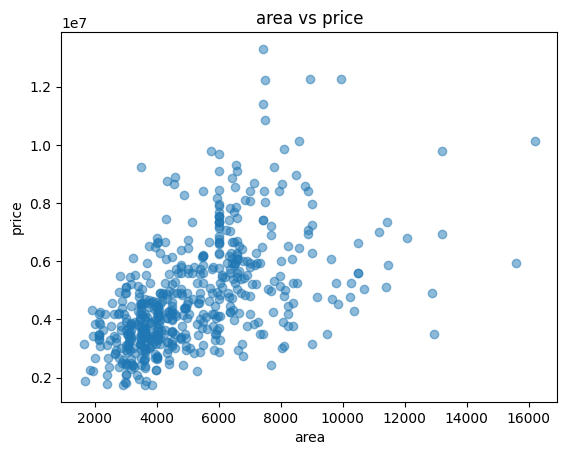

In [25]:
plt.figure()
plt.scatter(df["area"], df["price"], alpha=0.5)
plt.title("area vs price")
plt.xlabel("area")
plt.ylabel("price")
plt.show()

<Axes: xlabel='furnishingstatus', ylabel='price'>

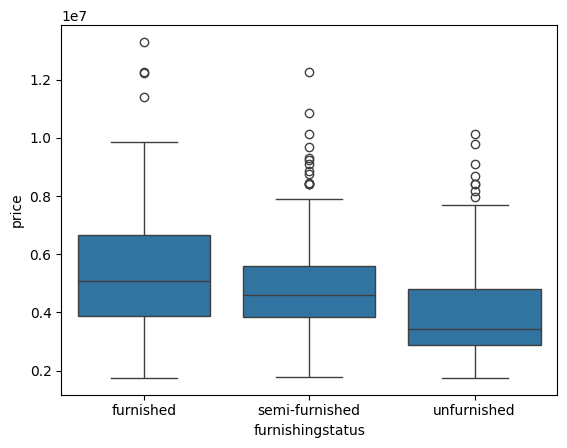

In [26]:
plt.figure()
sns.boxplot(x=df["furnishingstatus"], y=df["price"])

let's make a correlation heatmap


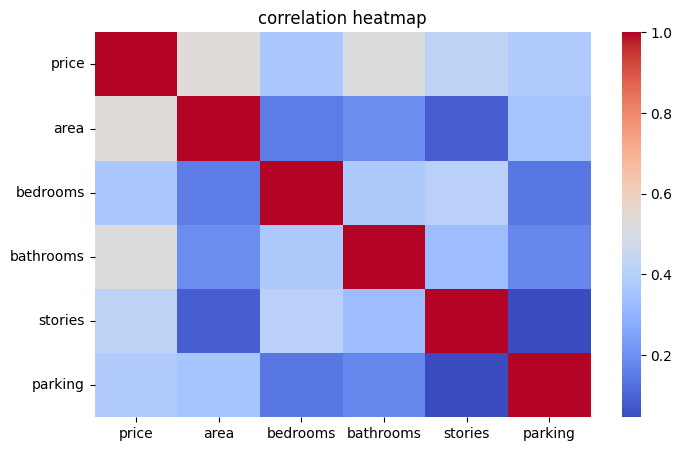

In [28]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8, 5))
sns.heatmap(corr, cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()

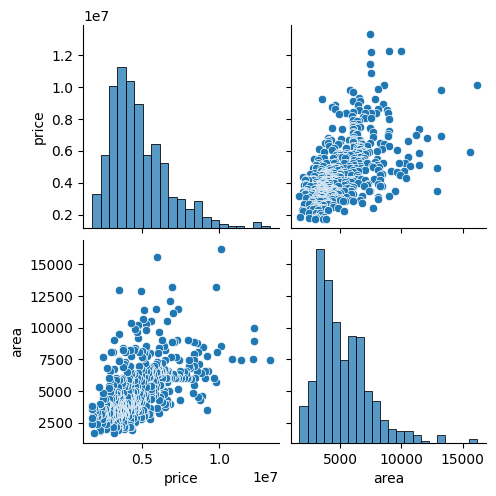

In [45]:
cols_for_pair = ["price", "area"]
sns.pairplot(df[cols_for_pair])
plt.show()


Sunburst visualization  for price segments

segments 18


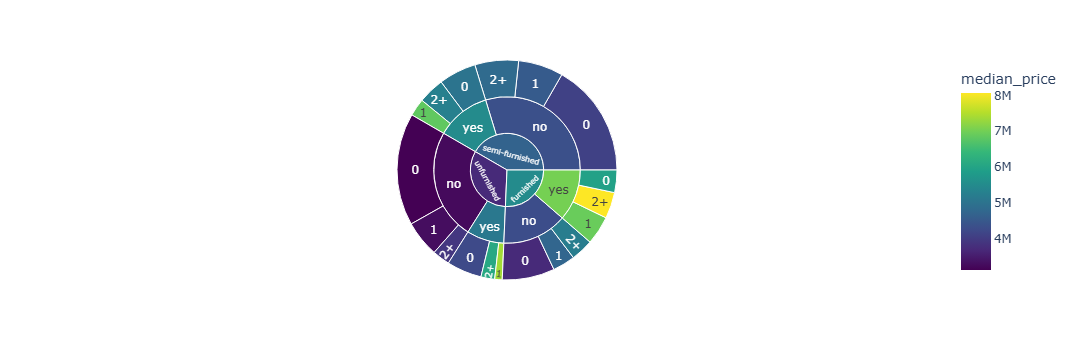

In [46]:
df["parking_cat"] = df["parking"].astype(str)
df.loc[df["parking"] >= 2, "parking_cat"] = "2+"
sun_data = (
    df
    .groupby(["furnishingstatus", "airconditioning", "parking_cat"])
    .agg(
        count=("price", "size"),
        median_price=("price", "median")
    )
    .reset_index()
)
print("segments", len(sun_data))
fig = px.sunburst(
    sun_data,
    path=["furnishingstatus", "airconditioning", "parking_cat"],
    values="count",
    color="median_price",
    color_continuous_scale="Viridis",
)
fig.show()

regression model

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
feat_cols = ["area", "bedrooms", "bathrooms", "stories", "parking"]
X = df[feat_cols]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

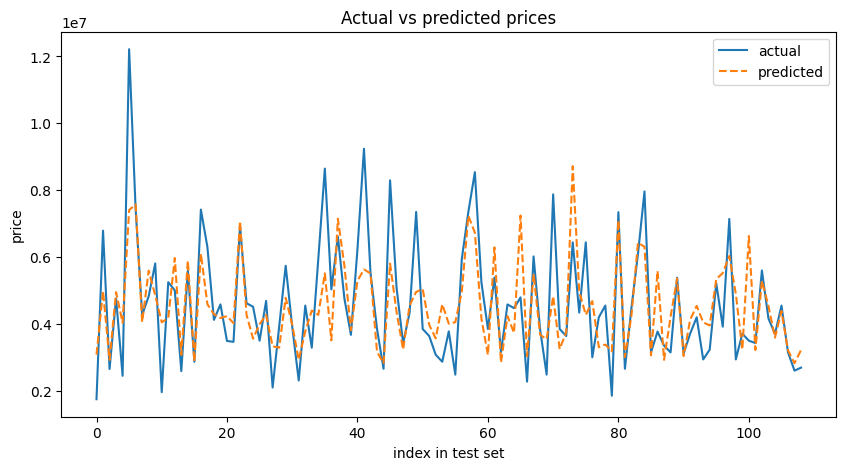

In [62]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="actual")
plt.plot(y_pred, label="predicted", linestyle="--")
plt.title("Actual vs predicted prices")
plt.xlabel("index in test set")
plt.ylabel("price")
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae, r2

(915617.4803790081, 0.5257009661596241)

MAE is around 0.9M and R² is about 0.52. So the model captures some of the pattern

In [64]:
yeo = YeoJohnsonTransformer(variables=feat_cols)
X_yeo = yeo.fit_transform(X)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_yeo, y, test_size=0.2, random_state=42
)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train2, y_train2)
y_pred2 = lin_reg2.predict(X_test2)
mae2 = mean_absolute_error(y_test2, y_pred2)
r2_2 = r2_score(y_test2, y_pred2)
mae2, r2_2

(1119351.0260047957, 0.5569504087801016)

The Yeo-Johnson version gives an MAE of about 1.12M and an R² of ~0.56. Compared to the original modelб the transformation slightly increases R² but also increases the eror.